In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
import warnings
warnings.filterwarnings ('ignore')

In [2]:
data = pd.read_csv('glass.csv')

In [3]:
data.head(5)

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [ ]:
Id number: 1 to 214
2.	 RI: refractive index
3.	Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4.	Mg: Magnesium
5.	Al: Aluminum
6.	Si: Silicon
7.	K: Potassium
8.	Ca: Calcium
9.	Ba: Barium
10.	Fe: Iron
11.	Type of glass


In [5]:
column_names = ['Id','RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass']
data.columns = column_names
print(data.head(5))


   Id       RI     Na    Mg    Al     Si     K    Ca   Ba    Fe  Type of glass
0   2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.00              1
1   3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.00              1
2   4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.00              1
3   5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.00              1
4   6  1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.0  0.26              1


In [6]:
data.info

<bound method DataFrame.info of       Id       RI     Na    Mg    Al     Si     K    Ca    Ba    Fe  \
0      2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.00   
1      3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.00   
2      4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.00   
3      5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.00   
4      6  1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.00  0.26   
..   ...      ...    ...   ...   ...    ...   ...   ...   ...   ...   
208  210  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.00   
209  211  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.00   
210  212  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.00   
211  213  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.00   
212  214  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.00   

     Type of glass  
0                1  
1                1  
2                1  
3                1  
4         

In [7]:
data.dtypes

Id                 int64
RI               float64
Na               float64
Mg               float64
Al               float64
Si               float64
K                float64
Ca               float64
Ba               float64
Fe               float64
Type of glass      int64
dtype: object

In [8]:
data.describe()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,108.000000,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,61.631972,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,2.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,55.000000,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,108.000000,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,161.000000,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [9]:
data.isnull().sum()

Id               0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

In [10]:
data.shape

(213, 11)

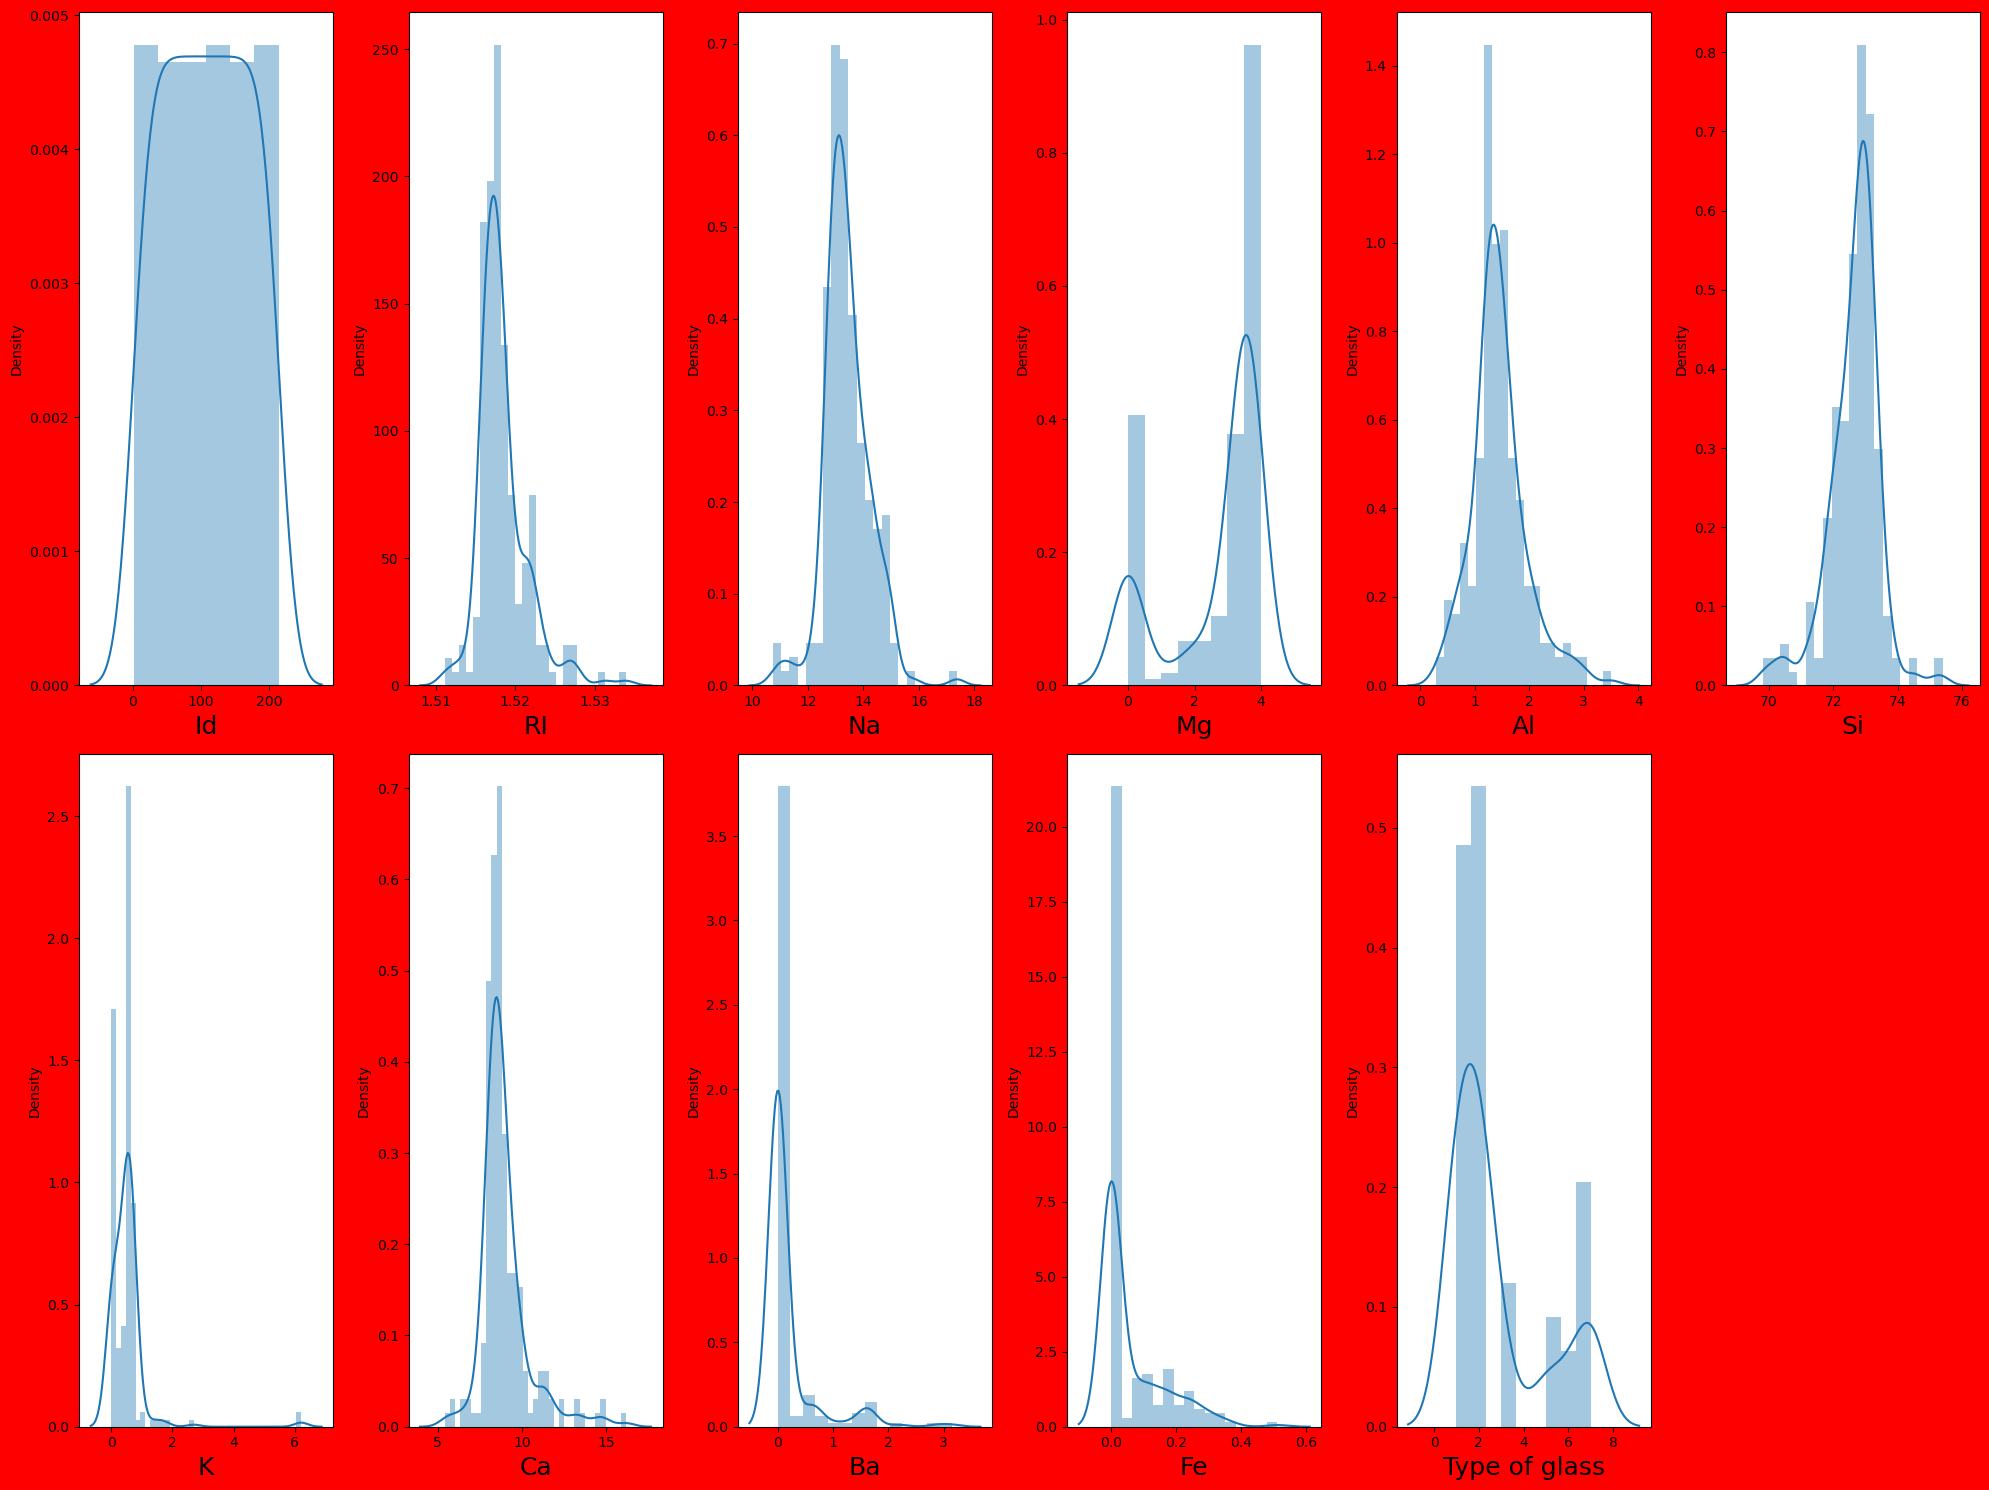

In [11]:
plt.figure(figsize=(20,15),facecolor='red')
plotnumber=1
for column in data:
    if plotnumber<=12:
        ax=plt.subplot(2,6,plotnumber)
        sns.distplot (data[column])
        plt.xlabel(column, fontsize=18)
        plotnumber+=1
        plt.tight_layout()

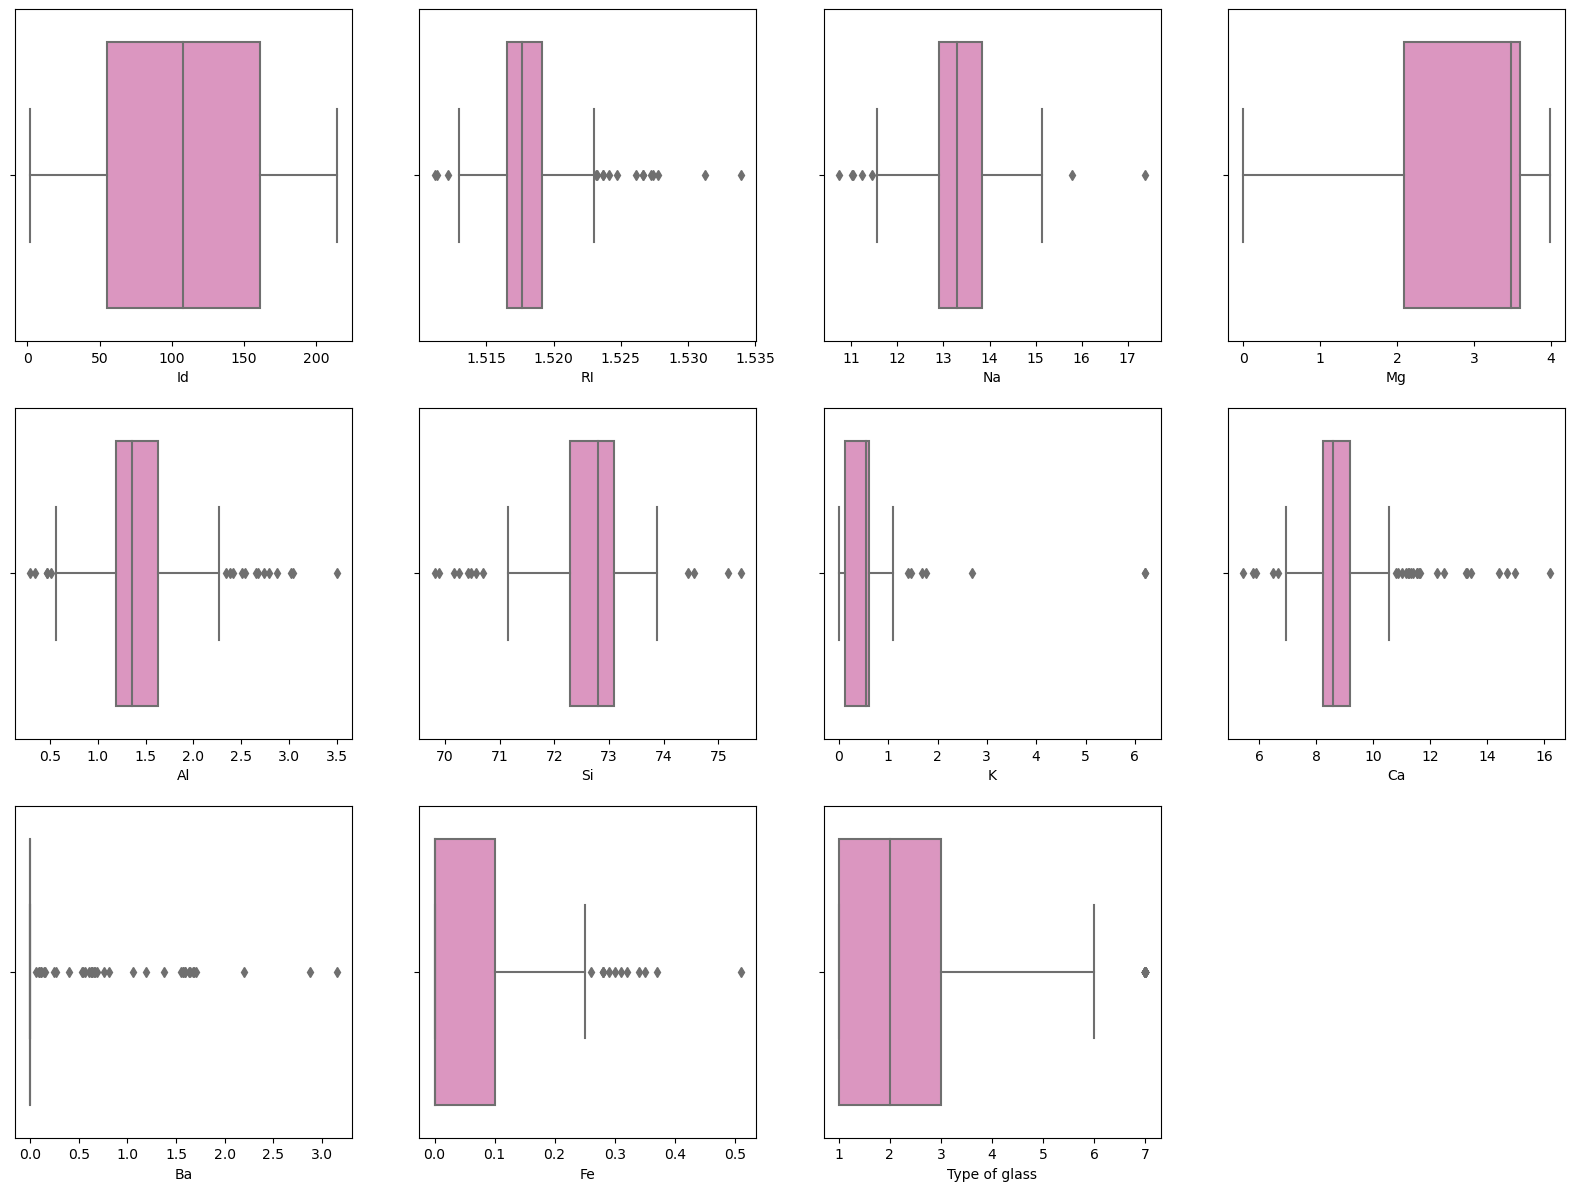

In [16]:
plt.figure(figsize=(20,25))
p=1
for i in data:
    if p<=13:
        plt.subplot(5,4,p)
        sns.boxplot(data[i], palette='Set2_r')
        plt.xlabel(i)
    p+=1
plt.show()

In [17]:
from scipy.stats import zscore
out_features=data[['K']]
z=np.abs(zscore(out_features))
z

,K
0,0.029329
1,0.167472
2,0.108813
3,0.078115
4,0.216258
...,...
208,0.643296
209,0.766090
210,0.766090
211,0.766090


In [18]:
from scipy.stats import zscore
out_features=data[['Ba']]
z=np.abs(zscore(out_features))
z

,Ba
0,0.353808
1,0.353808
2,0.353808
3,0.353808
4,0.353808
...,...
208,1.778672
209,2.844912
210,2.945501
211,2.804676


In [35]:
from scipy.stats import zscore
out_features=data[['Ca']]
z=np.abs(zscore(out_features))
z

,Ca
0,0.824512
1,0.860659
2,0.542562
3,0.651004
4,0.651004
...,...
207,0.346667
208,0.151470
209,0.412431
210,0.383513


In [38]:
from scipy.stats import zscore
out_features=data[['Fe']]
z=np.abs(zscore(out_features))
z

,Fe
0,0.586437
1,0.586437
2,0.586437
3,0.586437
4,2.140181
...,...
207,0.586437
208,0.586437
209,0.586437
210,0.586437


In [39]:
np.where(z>3)

(array([137, 154, 165], dtype=int64), array([0, 0, 0], dtype=int64))

In [40]:
data=data[(z<3).all(axis=1)]
data.shape

(198, 11)

In [42]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
iqr=q3-q1
data1=data[~((data <(q1 - 1.5 * iqr)) |(data> (q3 + 1.5 * iqr))).any(axis=1)]

In [43]:
data1=data

In [44]:
data.shape

(198, 11)

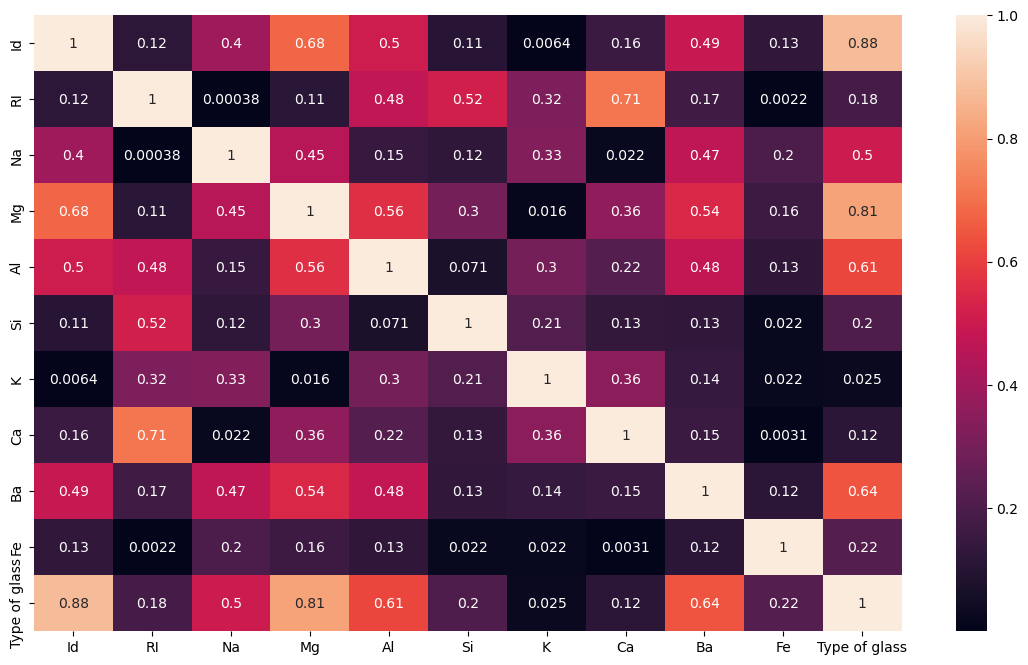

In [46]:
df_corr= data.corr().abs()
plt.figure (figsize=(14,8))
sns.heatmap(df_corr, annot=True,)
plt.show()

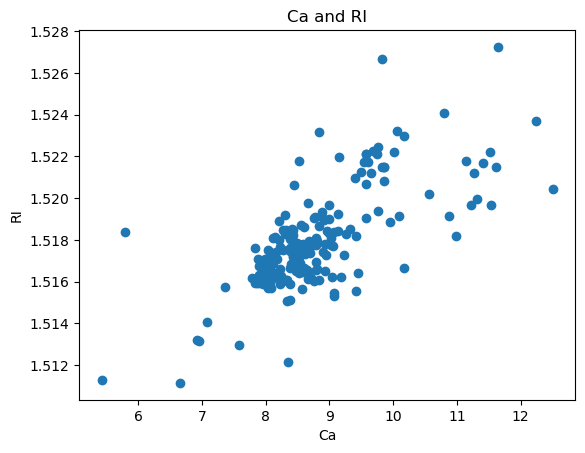

In [49]:
plt.scatter(data['Ca'], data['RI'])
plt.xlabel('Ca')
plt.ylabel('RI')
plt.title('Ca and RI')
plt.show()

In [50]:
from scipy.stats import yeojohnson
data['K'],_ = yeojohnson(data['K'])

In [51]:
from scipy.stats import yeojohnson
data['Fe'],_ = yeojohnson(data['Fe'])

In [52]:
from scipy.stats import yeojohnson
data['Ba'],_ = yeojohnson(data['Ba'])

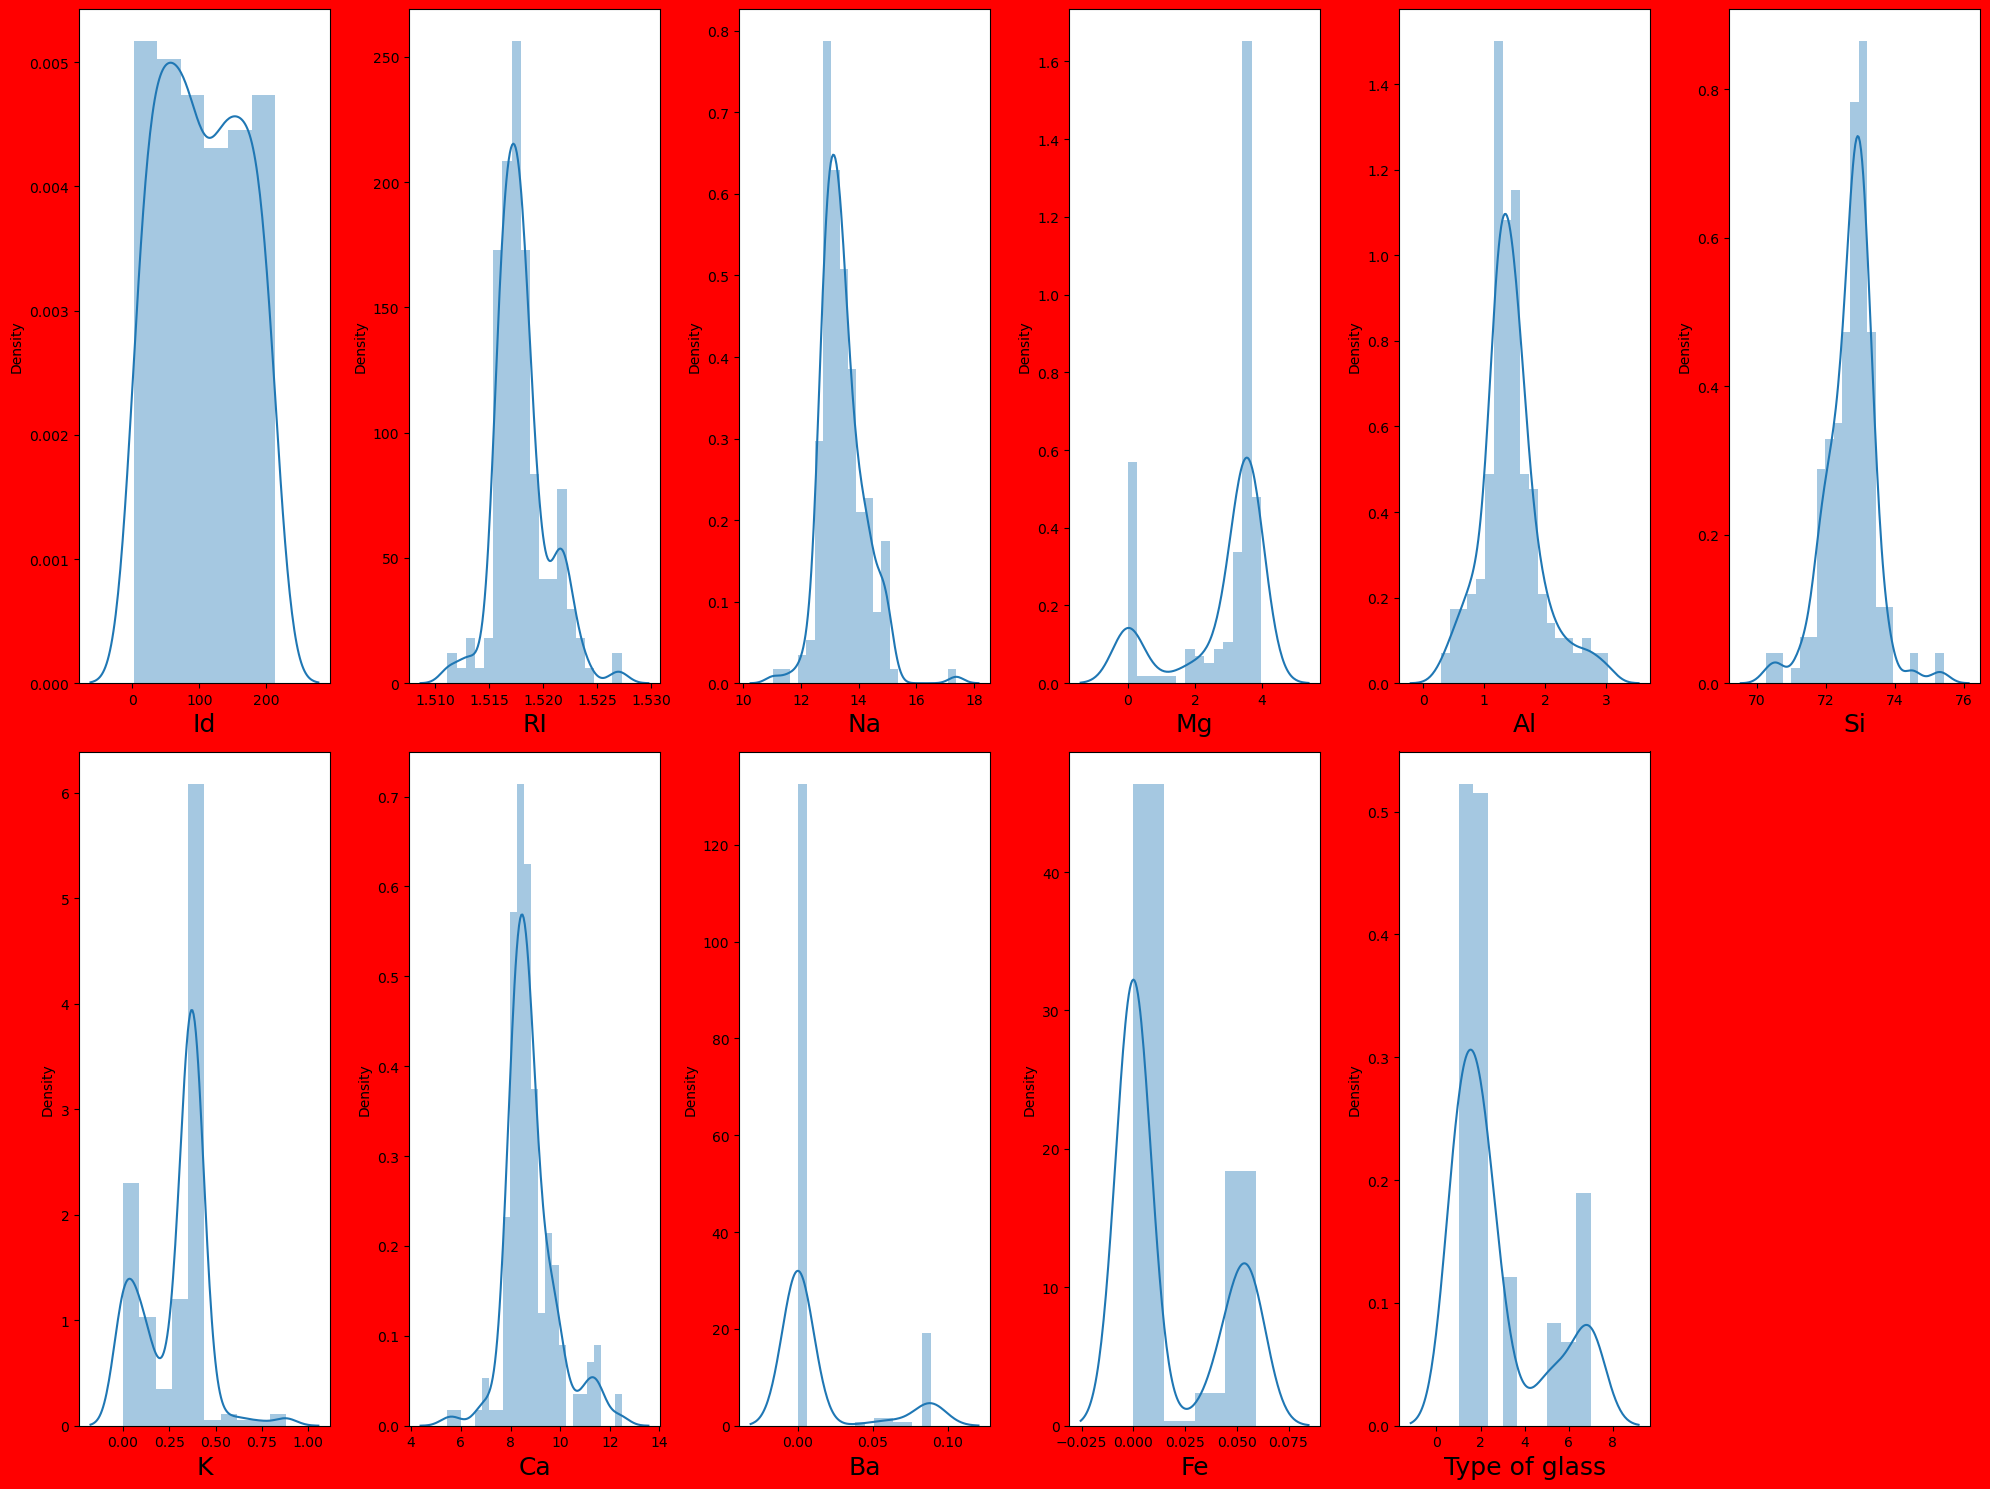

In [53]:
plt.figure(figsize=(20,15),facecolor='red')
plotnumber=1
for column in data:
    if plotnumber<=12:
        ax=plt.subplot(2,6,plotnumber)
        sns.distplot (data[column])
        plt.xlabel(column, fontsize=18)
        plotnumber+=1
        plt.tight_layout()

In [54]:
from sklearn.feature_selection import SelectPercentile, chi2

In [56]:
x=data.drop(['Type of glass'], axis=1)
y = data['Type of glass']

SPercentile= SelectPercentile(score_func=chi2, percentile=80)
SPercentile= SPercentile.fit(x,y)


In [57]:
cols= SPercentile.get_support (indices=True)
print ('Feature index=', cols)
features= x.columns[cols]
print ('Features= ', list(features))

Feature index= [0 2 3 4 6 7 8 9]
Features=  ['Id', 'Na', 'Mg', 'Al', 'K', 'Ca', 'Ba', 'Fe']


In [62]:
data_scores= pd.DataFrame({'features':x.columns, 'chi2score': SPercentile.scores_, 'pvalue':SPercentile.pvalues_})
data_scores.sort_values(by='chi2score', ascending=True)

,features,chi2score,pvalue
1,RI,0.000062,1.000000e+00
5,Si,0.090491,9.998731e-01
9,Fe,0.459533,9.935302e-01
2,Na,3.472163,6.276039e-01
7,Ca,4.815948,4.387528e-01
6,K,6.290887,2.789344e-01
8,Ba,9.532509,8.961830e-02
4,Al,15.135089,9.800451e-03
3,Mg,94.907864,6.243748e-19
0,Id,6577.287525,0.000000e+00


In [63]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(data)
x_scaled

array([[-1.66662544, -0.15447692,  0.62160424, ..., -0.42462074,
        -0.66839722, -0.82508132],
       [-1.6504136 , -0.75635659,  0.13341616, ..., -0.42462074,
        -0.66839722, -0.82508132],
       [-1.63420177, -0.13343218, -0.3005288 , ..., -0.42462074,
        -0.66839722, -0.82508132],
       ...,
       [ 1.72164741, -0.47435702,  2.01836457, ...,  2.52329353,
        -0.66839722,  2.0663541 ],
       [ 1.73785924,  1.12504349,  1.25896089, ...,  2.52330653,
        -0.66839722,  2.0663541 ],
       [ 1.75407107, -0.61746128,  1.28608245, ...,  2.52328741,
        -0.66839722,  2.0663541 ]])

In [80]:
x=data.drop (columns=['Type of glass', 'Id'], axis=1)
y=data['Type of glass']

In [81]:
x.head(5)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.51761,13.89,3.60,1.36,72.73,0.326178,7.83,-0.0,-0.000000
1,1.51618,13.53,3.55,1.54,72.99,0.281937,7.78,-0.0,-0.000000
2,1.51766,13.21,3.69,1.29,72.61,0.365422,8.22,-0.0,-0.000000
3,1.51742,13.27,3.62,1.24,73.08,0.357089,8.07,-0.0,-0.000000
4,1.51596,12.79,3.61,1.62,72.97,0.393011,8.07,-0.0,0.058552


In [82]:
x_train, x_test, y_train, y_test= train_test_split (x,y, test_size= 0.2, random_state= 4)

In [83]:
from sklearn.model_selection import cross_val_score
lr = LogisticRegression()
cv = cross_val_score(lr,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.625      0.625      0.5625     0.64516129 0.51612903]
0.594758064516129


In [84]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.75       0.875      0.71875    0.87096774 0.70967742]
0.7848790322580645


In [85]:
from sklearn.metrics import make_scorer

rf = RandomForestClassifier()
lr = LogisticRegression()

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

param_grid_lr = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

grid_search_rf = GridSearchCV(rf, param_grid_rf, scoring=make_scorer(accuracy_score), cv=5)
grid_search_lr = GridSearchCV(lr, param_grid_lr, scoring=make_scorer(accuracy_score), cv=5)

grid_search_rf.fit(x_train, y_train)
grid_search_lr.fit(x_train, y_train)

best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

best_params_lr = grid_search_lr.best_params_
best_score_lr = grid_search_lr.best_score_

best_model_rf = grid_search_rf.best_estimator_
best_model_lr = grid_search_lr.best_estimator_

y_pred_rf = best_model_rf.predict(x_test)
y_pred_lr = best_model_lr.predict(x_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

print(f"Best Random Forest Model - Hyperparameters: {best_params_rf}, Accuracy: {accuracy_rf}")
print(f"Best Logistic Regression Model - Hyperparameters: {best_params_lr}, Accuracy: {accuracy_lr}")


Best Random Forest Model - Hyperparameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}, Accuracy: 0.8
Best Logistic Regression Model - Hyperparameters: {'C': 10, 'penalty': 'l2'}, Accuracy: 0.7


In [87]:
rf=RandomForestClassifier(n_estimators= 100, max_depth= 10, min_samples_split=5)
rf.fit(x_train, y_train)


RandomForestClassifier(max_depth=10, min_samples_split=5)

In [88]:
y_pred = rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Random Forest Model - Accuracy: {accuracy}")

Random Forest Model - Accuracy: 0.825


In [89]:
from sklearn.metrics import classification_report
print ( classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.86      0.60      0.71        10
           2       0.79      0.94      0.86        16
           3       0.50      0.50      0.50         2
           5       0.75      1.00      0.86         3
           7       1.00      0.89      0.94         9

    accuracy                           0.82        40
   macro avg       0.78      0.79      0.77        40
weighted avg       0.84      0.82      0.82        40



In [90]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

x= data.drop (columns= ['Type of glass', 'Id'])
y= data ['Type of glass']
rf = RandomForestClassifier()

n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42) 
accuracy_scores = []
for train_index, test_index in kf.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    rf.fit(x_train, y_train)

    y_pred = rf.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

mean_accuracy = sum(accuracy_scores) / n_splits
print(f"Mean Accuracy: {mean_accuracy:.2f}")


Mean Accuracy: 0.73
